In [23]:
# Dependencies
import tweepy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import time
# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
from config import (consumer_key, 
                    consumer_secret, 
                    access_token, 
                    access_token_secret)

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [24]:
# Target Search Term
target_orgs = ("@BBC", "@CBS", "@CNN","@FOXTV", "@nytimes")
# List to hold results
sentiments = []

# Loop through all target users
for target in target_orgs:

    # Variable for holding the oldest tweet
    oldest_tweet = None
    counter = 1
    # Variables for holding sentiments
    compound_list = []
    positive_list = []
    negative_list = []
    neutral_list = []

    # Loop through 10 times
    for x in range(1, 6):

        public_tweets = api.user_timeline(target, page=x, result_type="recent", max_id=oldest_tweet)

        # Loop through all tweets
        for tweet in public_tweets:       
            
            # Run Vader Analysis on each tweet
            results = analyzer.polarity_scores(tweet["text"])
            compound = results["compound"]
            pos = results["pos"]
            neu = results["neu"]
            neg = results["neg"]

            # Add each value to the appropriate list
            compound_list.append(compound)
            positive_list.append(pos)
            negative_list.append(neg)
            neutral_list.append(neu)
            
            # Set the new oldest_tweet value
            oldest_tweet = tweet["id"] - 1  
            #Build data for df in need
            sentiments.append({"Date": tweet["created_at"],
                               "User": tweet["user"]["name"],
                               "Tweet": tweet["text"],
                               "Compound": compound,
                               "Positive": pos,
                               "Negative": neu,
                               "Neutral": neg,
                               "Count": counter})
            counter += 1

    #Print the Sentiments
    #print(sentiments)
    

In [25]:
df = pd.DataFrame(sentiments).round(3)
df.to_csv("Sentiments.csv", encoding='utf-8', index=False, header=True)
df.head()

,Compound,Count,Date,Negative,Neutral,Positive,Tweet,User
0,-0.599,1,Sun Sep 30 08:30:16 +0000 2018,0.698,0.302,0.000,RT @BBCWorld: Indonesia quake death toll 'at l...,BBC
1,0.000,2,Sun Sep 30 07:31:05 +0000 2018,0.752,0.124,0.124,"For children with autism, the stress of taking...",BBC
2,0.586,3,Sun Sep 30 07:04:02 +0000 2018,0.774,0.000,0.226,This. Is. Amazing. 😮\n\nIntroducing the World ...,BBC
3,0.422,4,Sat Sep 29 20:32:03 +0000 2018,0.743,0.000,0.257,Chile has launched a huge hiking route through...,BBC
4,0.422,5,Sat Sep 29 17:02:12 +0000 2018,0.865,0.000,0.135,🐣😍 Conservationists have been monitoring the p...,BBC


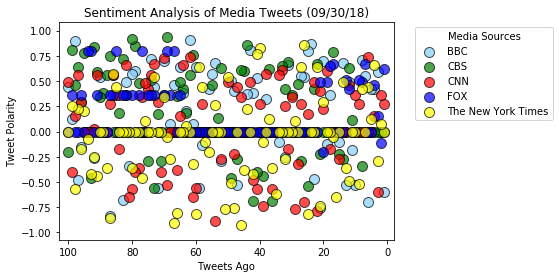

In [26]:
# Create plot
bbc_df = df.loc[df['User']=="BBC"]
x_bbc = bbc_df['Count']
y_bbc = bbc_df['Compound']
plt_bbc = plt.scatter(x_bbc,y_bbc, marker="o",s=100,facecolors="lightskyblue",edgecolors="black",
                    alpha=0.7,linewidths=1, label="BBC")


cbs_df = df.loc[df['User']=="CBS"]
x_cbs = cbs_df['Count']
y_cbs = cbs_df['Compound']
plt_cbs = plt.scatter(x_cbs,y_cbs, marker="o",s=100,facecolors="Green",edgecolors="black",
                    alpha=0.7,linewidths=1, label="CBS")

cnn_df = df.loc[df['User']=="CNN"]
x_cnn = cnn_df['Count']
y_cnn = cnn_df['Compound']
plt_cnn = plt.scatter(x_cnn,y_cnn, marker="o", s=100,facecolors="Red",edgecolors="black",
                    alpha=0.7,linewidths=1, label="CNN")

fox_df = df.loc[df['User']=="FOX"]
x_fox = fox_df['Count']
y_fox = fox_df['Compound']
plt_fox = plt.scatter(x_fox,y_fox, marker="o",s=100,facecolors="Blue",edgecolors="black",
                    alpha=0.7,linewidths=1, label="FOX")

nyt_df = df.loc[df['User']=="The New York Times"]
x_nyt = nyt_df['Count']
y_nyt = nyt_df['Compound']
plt_nyt = plt.scatter(x_nyt,y_nyt, marker="o",s=100,facecolors="Yellow",edgecolors="black",
                    alpha=0.7,linewidths=1, label="The New York Times")

plt.title("Sentiment Analysis of Media Tweets (%s)" % time.strftime("%x"))
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.xlim([x_bbc.max()+3, x_bbc.min()-3])
plt.legend(handles=[plt_bbc,plt_cbs,plt_cnn,plt_fox,plt_nyt],title="Media Sources", bbox_to_anchor=(1.05, 1), loc=2)
plt.savefig("Sentiment_analysis.png")
plt.show()

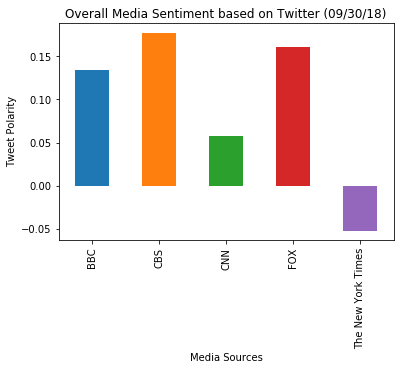

In [27]:
average_compound = (df.groupby("User").mean())['Compound']
average_compound.plot(kind="bar", title="Overall Media Sentiment based on Twitter (%s)" % time.strftime("%x"))
plt.ylabel("Tweet Polarity")
plt.xlabel("Media Sources")
plt.savefig("Overall_sentiment.png")
plt.show()

Observation:
1. In the most recent 100 tweets posted by each media, NY Times has the most negative sentiment. 
   The other four media have positive sentiment.
2. Among the other four media, CBS and foxTV are more positive on average, followed by BBC. 
   CNN is obviously less positive than CBS, foxTV and BBC, it only exceeds the positive creteria.
3. Neutral sentiments dominate, among all media.
